In [6]:
from __future__ import division

from math import sqrt, cos, sin, acos, pi, atan2
from matplotlib import cm
from matplotlib import patches
from matplotlib.colors import LogNorm
from matplotlib.path import Path
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

import sphereml
from scipy.optimize import differential_evolution
from pyfde import JADE
%run algorithms/genetic.py
import lcmaes
from fitness_function import evaluate

import time
from joblib import Parallel, delayed
from persistence import save, load
import pyformulas as pf

factor=1.3					# area of plot

In [7]:
def plot_hist(hist, label, linestyle='-'):
    histarr = np.array(hist)
    xs,ys = histarr[:,0],histarr[:,1]
    plt.plot(xs, ys, linestyle=linestyle, label=label)

In [79]:
def shift(a, s):
    return [(x + s, y) for (x, y) in a]

cma = load("results/cma/500000_many_runs")
cma_hist = cma[20]
i = 0
while cma_hist[-1][0] < 100000:
#while i + 1 < len(cma):
    i += 1
    cma_hist += shift(cma[i], cma_hist[-1][0])
#cma_hist += shift(cma[2], cma_hist[-1][0])
while cma_hist[-1][0] > 100000:
    cma_hist = cma_hist[:-1]

In [107]:
gen_hist = load("results/genetic/popsize")[21][0]
jade_hist = load("results/jade/235layers_100k200400k500k")[2][70][0]
de_hist = load("results/DE/100000")[0]
opo_hist = load("results/1+1/100000")[0]

In [102]:
de_hist.shape

(134, 2)

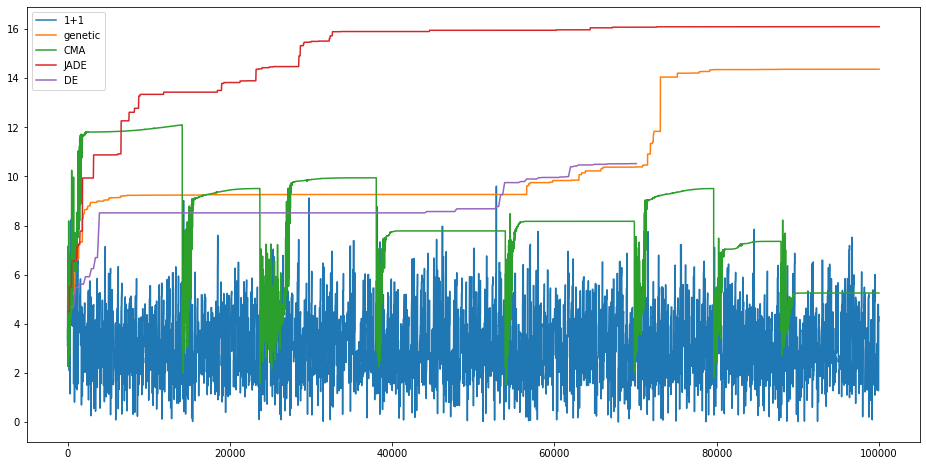

In [108]:
plt.figure(figsize=(16,8))
plot_hist(opo_hist, label='1+1')
plot_hist(gen_hist, label='genetic')
plot_hist(cma_hist, label='CMA')
plot_hist(jade_hist, label='JADE')
plot_hist(de_hist, label='DE')
plt.legend();